## Graphical Examples of different Validation Techniques

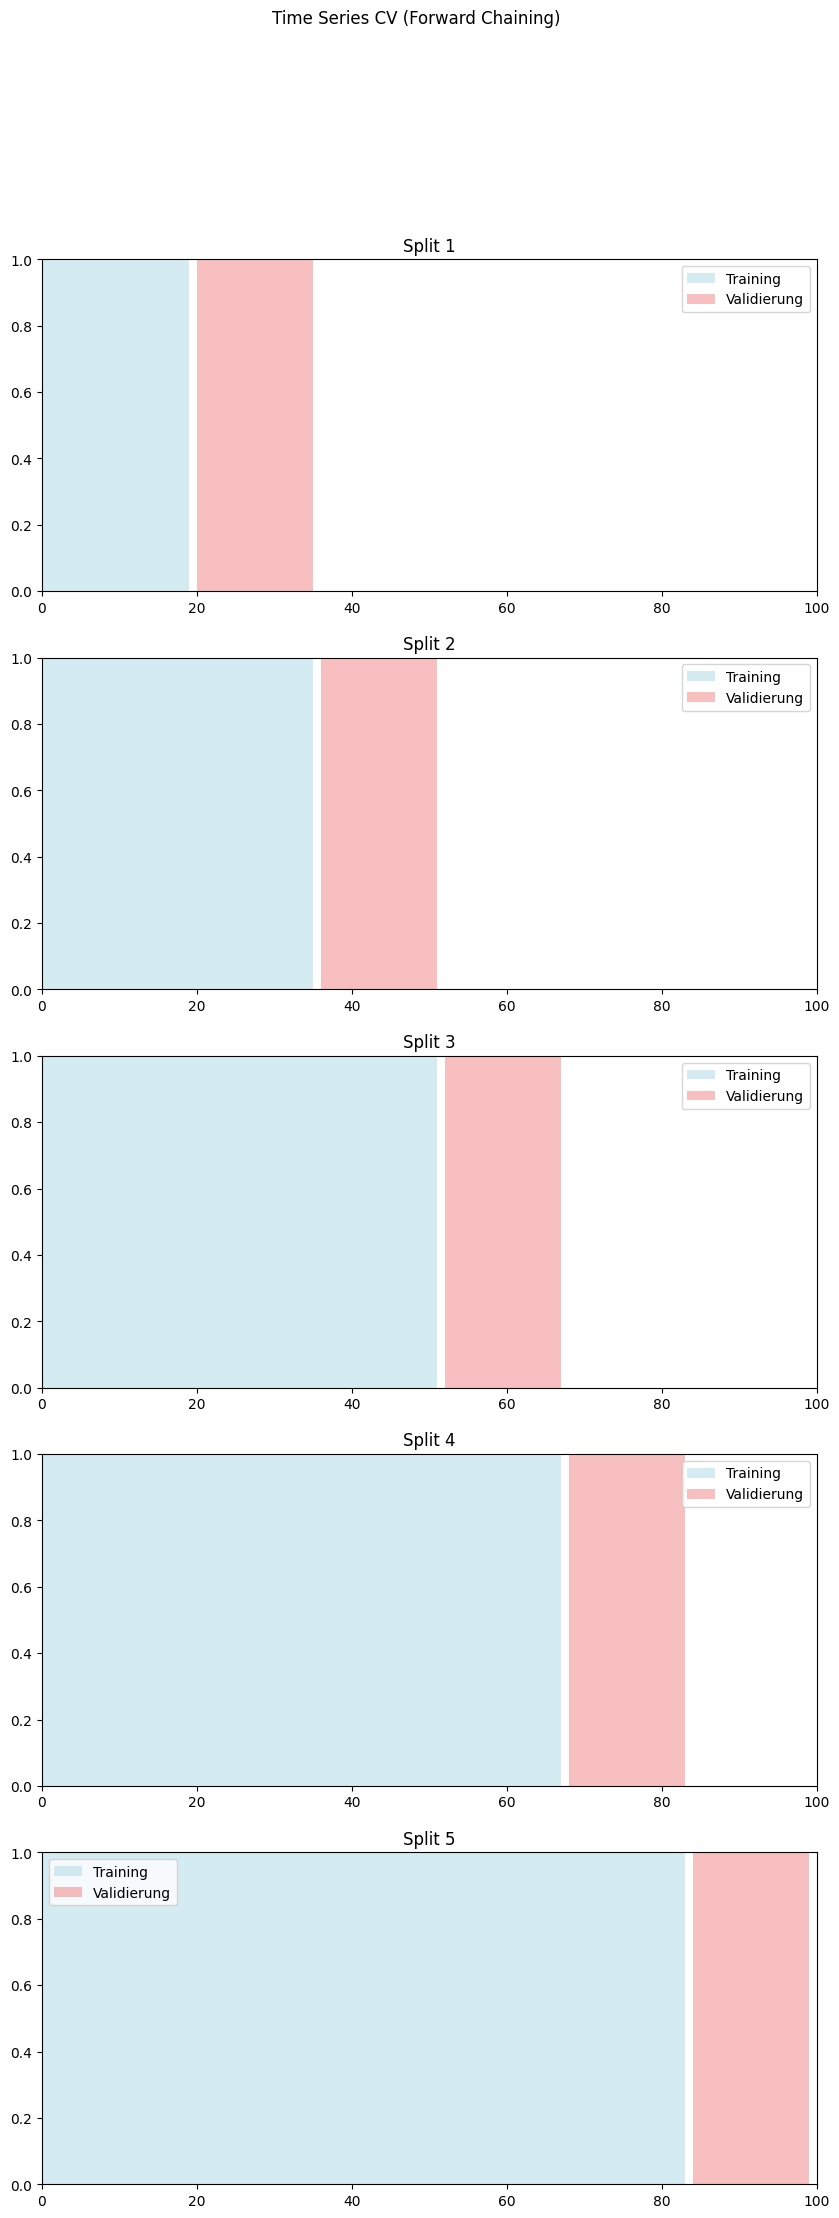

RMSE-Scores: [np.float64(1.2905363256572606), np.float64(1.0684956478443732), np.float64(1.1111079990962838), np.float64(1.8320752208130824), np.float64(0.41647950254775423)]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

def time_series_cv_subplots(X, y, n_splits):
    """Führt Time Series CV (Forward Chaining) mit separaten Unterplots durch."""

    tscv = TimeSeriesSplit(n_splits=n_splits)
    rmse_scores = []

    fig, axes = plt.subplots(n_splits, 1, figsize=(10, 5 * n_splits))
    fig.suptitle("Time Series CV (Forward Chaining)")

    for i, (train_index, val_index) in enumerate(tscv.split(X)):
        X_train, y_train = X[train_index], y[train_index]
        X_val, y_val = X[val_index], y[val_index]

        # Modelltraining und -vorhersage (Beispiel)
        model = np.polyfit(X_train.flatten(), y_train, 1)  # Lineare Regression
        y_pred = np.polyval(model, X_val.flatten())
        rmse = np.sqrt(np.mean((y_val - y_pred)**2))
        rmse_scores.append(rmse)

        # Grafik
        axes[i].axvspan(train_index[0], train_index[-1], facecolor='lightblue', alpha=0.5, label='Training')
        axes[i].axvspan(val_index[0], val_index[-1], facecolor='lightcoral', alpha=0.5, label='Validierung')
        axes[i].set_title(f"Split {i+1}")
        axes[i].set_xlim(0, len(X))
        axes[i].legend()

    plt.show()
    print("RMSE-Scores:", rmse_scores)

# Beispielanwendung
X = np.array(range(100)).reshape(-1, 1)
y = np.sin(X.flatten() / 10) + np.random.randn(100) * 0.1
time_series_cv_subplots(X, y, n_splits=5)

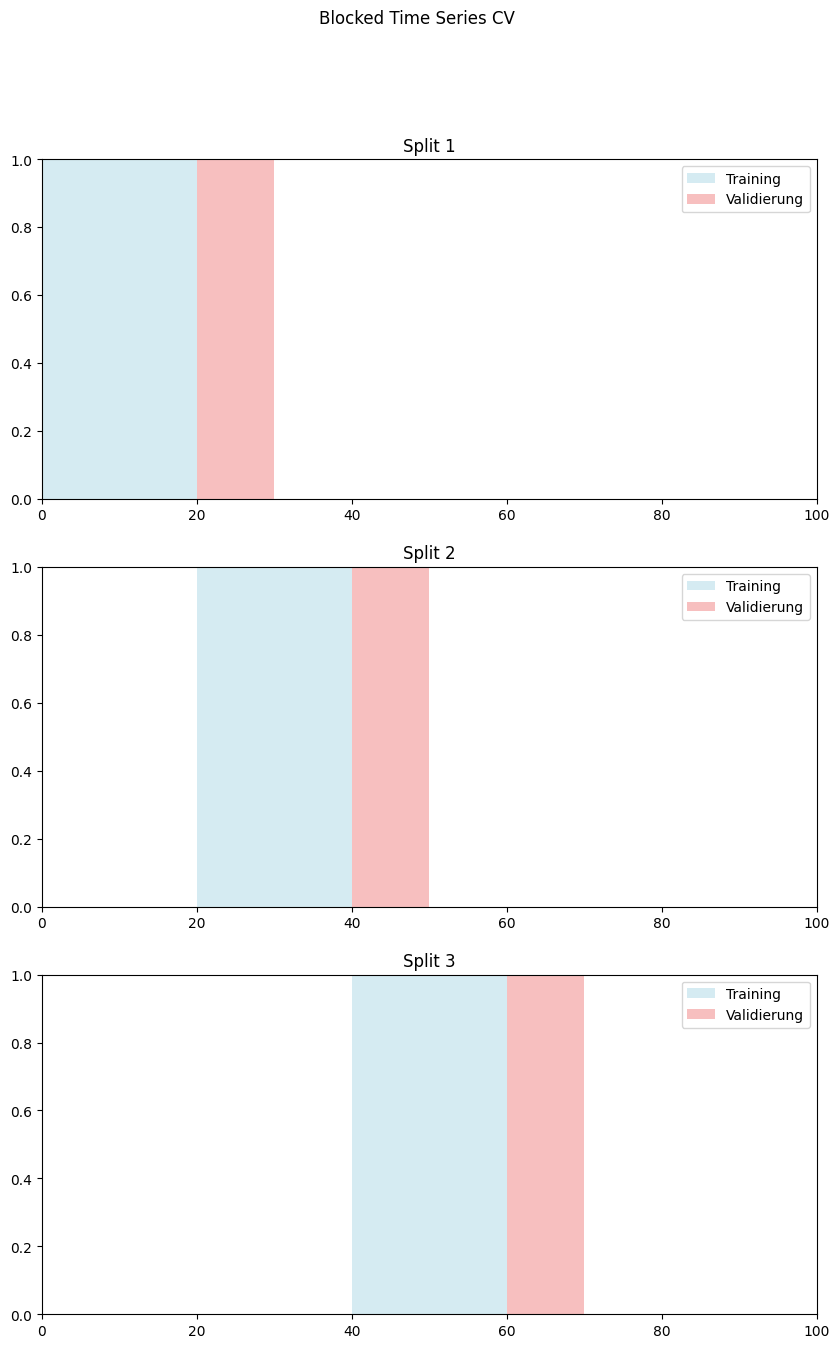

RMSE-Scores: [np.float64(0.8393223098008834), np.float64(0.31667499852617775), np.float64(0.8301221823899788)]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def blocked_time_series_cv_subplots(X, y, block_size, val_size, n_splits):
    """Führt Blocked Time Series CV mit separaten Unterplots durch."""

    rmse_scores = []

    fig, axes = plt.subplots(n_splits, 1, figsize=(10, 5 * n_splits))
    fig.suptitle("Blocked Time Series CV")

    for i in range(n_splits):
        start_train = i * block_size
        end_train = start_train + block_size
        end_val = end_train + val_size

        X_train, y_train = X[start_train:end_train], y[start_train:end_train]
        X_val, y_val = X[end_train:end_val], y[end_train:end_val]

        # Modelltraining und -vorhersage (Beispiel)
        model = np.polyfit(X_train.flatten(), y_train, 1)  # Lineare Regression
        y_pred = np.polyval(model, X_val.flatten())
        rmse = np.sqrt(np.mean((y_val - y_pred)**2))
        rmse_scores.append(rmse)

        # Grafik
        axes[i].axvspan(start_train, end_train, facecolor='lightblue', alpha=0.5, label='Training')
        axes[i].axvspan(end_train, end_val, facecolor='lightcoral', alpha=0.5, label='Validierung')
        axes[i].set_title(f"Split {i+1}")
        axes[i].set_xlim(0, len(X))
        axes[i].legend()

    plt.show()
    print("RMSE-Scores:", rmse_scores)

# Beispielanwendung
X = np.array(range(100)).reshape(-1, 1)
y = np.sin(X.flatten() / 10) + np.random.randn(100) * 0.1
blocked_time_series_cv_subplots(X, y, block_size=20, val_size=10, n_splits=3)

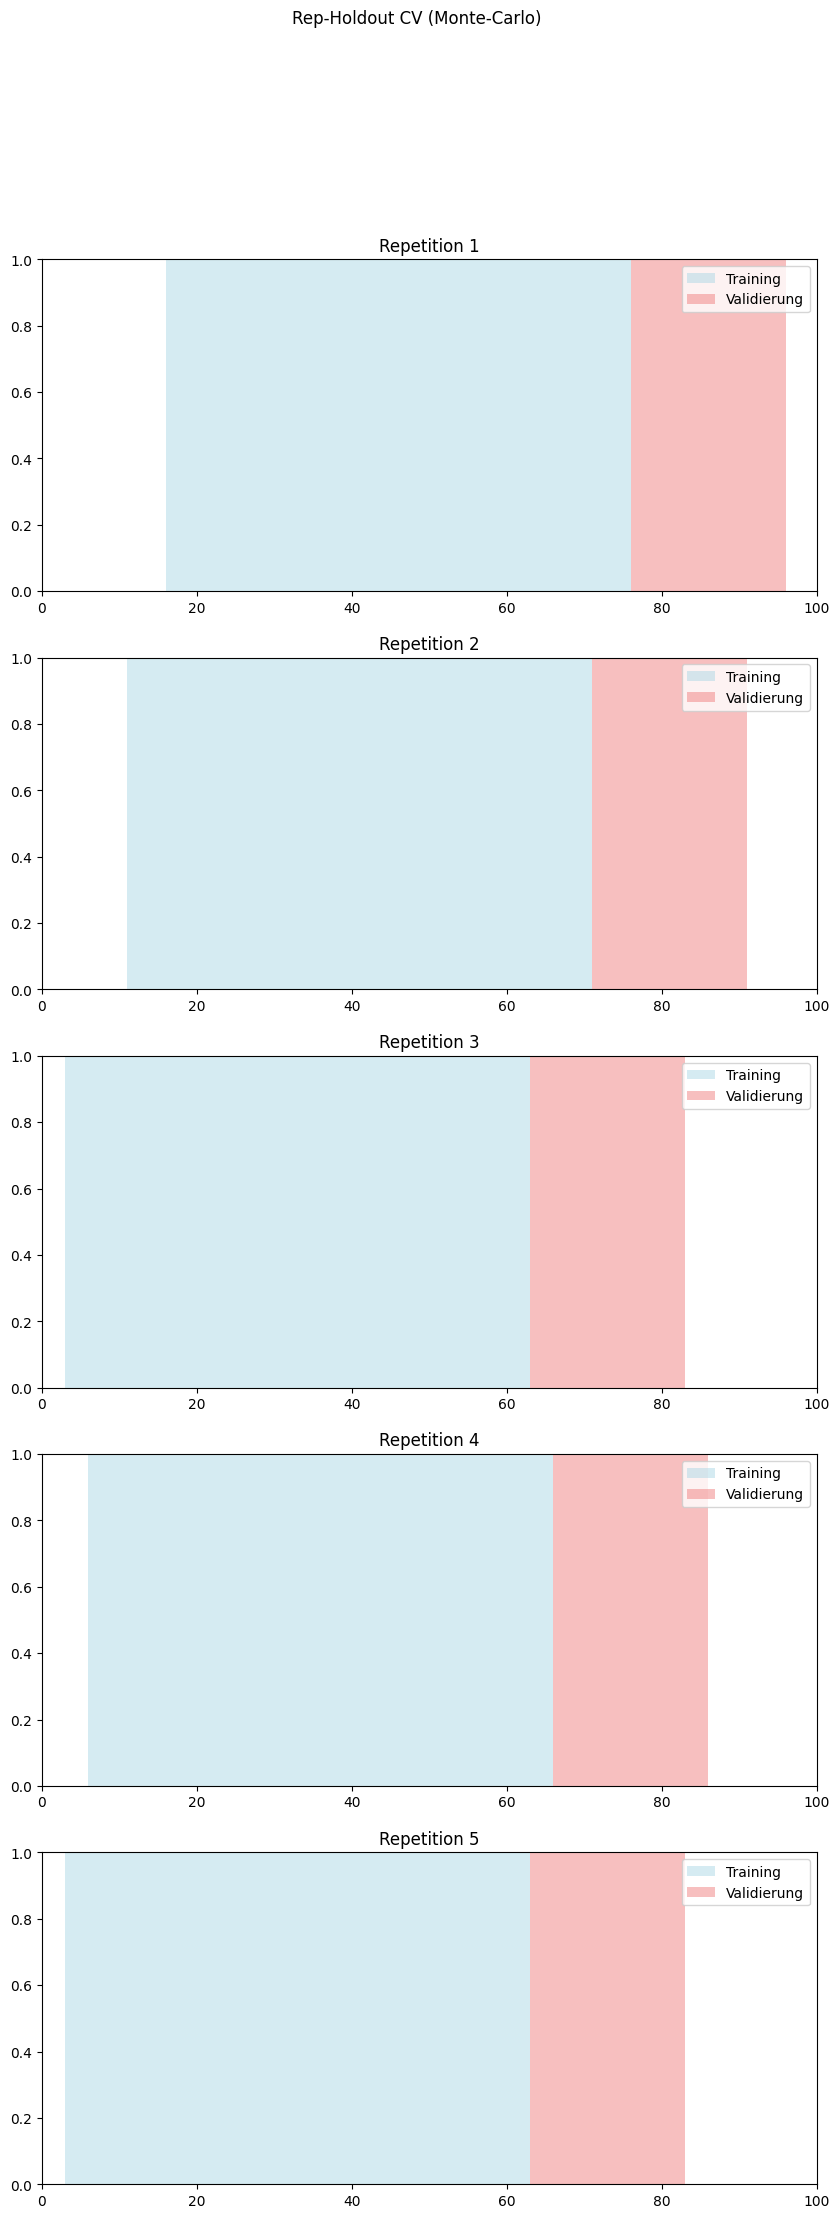

RMSE-Scores: [np.float64(0.9741052680314936), np.float64(1.6828312102964977), np.float64(2.144743926327055), np.float64(2.113075561637672), np.float64(2.144743926327055)]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def rep_holdout_cv_subplots(X, y, train_size, val_size, n_reps):
    """Führt Rep-Holdout CV (Monte-Carlo Simulation) mit separaten Unterplots durch."""

    rmse_scores = []

    fig, axes = plt.subplots(n_reps, 1, figsize=(10, 5 * n_reps))
    fig.suptitle("Rep-Holdout CV (Monte-Carlo)")

    for i in range(n_reps):
        random_point = np.random.randint(train_size, len(X) - val_size)
        start_train = random_point - train_size
        end_train = random_point
        end_val = random_point + val_size

        X_train, y_train = X[start_train:end_train], y[start_train:end_train]
        X_val, y_val = X[end_train:end_val], y[end_train:end_val]

        # Modelltraining und -vorhersage (Beispiel)
        model = np.polyfit(X_train.flatten(), y_train, 1)  # Lineare Regression
        y_pred = np.polyval(model, X_val.flatten())
        rmse = np.sqrt(np.mean((y_val - y_pred)**2))
        rmse_scores.append(rmse)

        # Grafik
        axes[i].axvspan(start_train, end_train, facecolor='lightblue', alpha=0.5, label='Training')
        axes[i].axvspan(end_train, end_val, facecolor='lightcoral', alpha=0.5, label='Validierung')
        axes[i].set_title(f"Repetition {i+1}")
        axes[i].set_xlim(0, len(X))
        axes[i].legend()

    plt.show()
    print("RMSE-Scores:", rmse_scores)

# Beispielanwendung
X = np.array(range(100)).reshape(-1, 1)
y = np.sin(X.flatten() / 10) + np.random.randn(100) * 0.1
rep_holdout_cv_subplots(X, y, train_size=60, val_size=20, n_reps=5)